In [1]:
import numpy as np
import pandas as pd

In [2]:
A = np.random.uniform(0.5, 1, 300)           # Amplitude values for each sample
x_values = np.linspace(0, 2 * np.pi, 36)     # 36 points between 0 and 2pi
w_values = np.random.uniform(0, 2 * np.pi, 300)  # 300 random phase values

In [3]:
Y_in = np.zeros((300, 36))
Y_out = np.zeros((300, 36))

In [4]:
for i in range(300):
    Y_in[i] = A[i] * np.sin(x_values + w_values[i])
    Y_out[i] = A[i] * np.cos(x_values + w_values[i])

In [5]:
Y_in.shape

(300, 36)

In [6]:
Y_out.shape

(300, 36)

In [7]:
import matplotlib.pyplot as plt


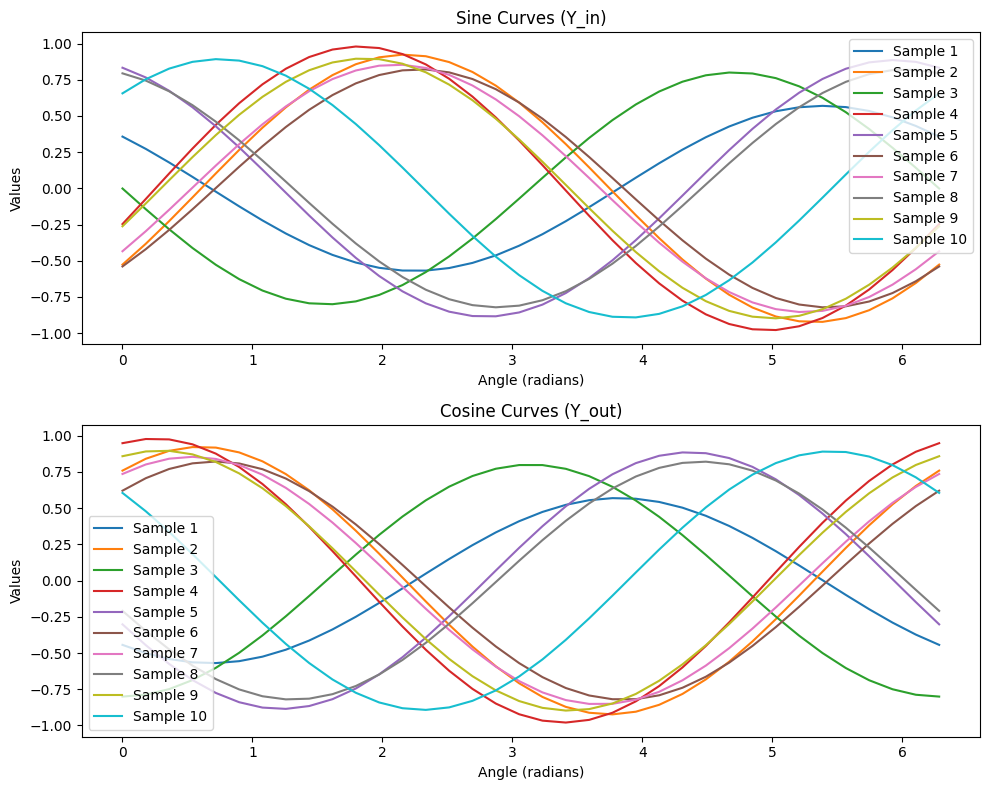

In [8]:
num_samples_to_plot = 10
fig, ax = plt.subplots(2, figsize=(10, 8))

for i in range(num_samples_to_plot):
    ax[0].plot(x_values, Y_in[i], label=f'Sample {i+1}')
ax[0].set_title('Sine Curves (Y_in)')
ax[0].set_xlabel('Angle (radians)')
ax[0].set_ylabel('Values')
ax[0].legend()

for i in range(num_samples_to_plot):
    ax[1].plot(x_values, Y_out[i], label=f'Sample {i+1}')
ax[1].set_title('Cosine Curves (Y_out)')
ax[1].set_xlabel('Angle (radians)')
ax[1].set_ylabel('Values')
ax[1].legend()

plt.tight_layout()
plt.show()

In [9]:
Y_in

array([[ 0.35757881,  0.27258315,  0.17882644, ...,  0.49072907,
         0.4310816 ,  0.35757881],
       [-0.52642098, -0.38239588, -0.22608026, ..., -0.7596271 ,
        -0.65352648, -0.52642098],
       [-0.0010428 , -0.14401157, -0.28235169, ...,  0.28039907,
         0.14195948, -0.0010428 ],
       ...,
       [-0.21526011, -0.10065307,  0.01718903, ..., -0.42025707,
        -0.32294851, -0.21526011],
       [ 0.90965576,  0.96911916,  0.99743426, ...,  0.70586863,
         0.82095529,  0.90965576],
       [ 0.90183806,  0.95610027,  0.97963264, ...,  0.70903183,
         0.81859002,  0.90183806]])

In [10]:
Y_out

array([[-0.44383178, -0.50054738, -0.54117498, ..., -0.2898866 ,
        -0.37285106, -0.44383178],
       [ 0.75922748,  0.84102248,  0.89578632, ...,  0.52584416,
         0.65303029,  0.75922748],
       [-0.80078413, -0.787729  , -0.74935561, ..., -0.75008844,
        -0.7881014 , -0.80078413],
       ...,
       [ 0.62247787,  0.65091057,  0.65842247, ...,  0.50714851,
         0.57403822,  0.62247787],
       [ 0.41489261,  0.24579981,  0.06880679, ...,  0.70806706,
         0.57065042,  0.41489261],
       [ 0.38506004,  0.21784257,  0.04362345, ...,  0.67738983,
         0.53990137,  0.38506004]])

In [11]:
Sin = Y_in
Cos = Y_out

In [26]:
Sin = pd.DataFrame(Sin)
Cos = pd.DataFrame(Cos)

In [27]:
Sin.to_csv('Sin.csv', index=False)
Cos.to_csv('Cos.csv', index=False)

In [24]:
Sin.size

10800

In [25]:
Cos.size

10800

In [12]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( Sin, Cos, test_size=0.2, random_state=42)

In [13]:
#ANN Model
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense

In [14]:
# Initialize the model
from tensorflow.keras.models import Sequential

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(36,)),  # Input layer with 36 features
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(36)]) # Output layer with 36 neurons for cosine values

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
#compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

In [17]:
final_model= model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.3285 - mae: 0.4900 - val_loss: 0.2158 - val_mae: 0.3972
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2367 - mae: 0.4163 - val_loss: 0.1703 - val_mae: 0.3359
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1727 - mae: 0.3411 - val_loss: 0.1236 - val_mae: 0.2744
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1220 - mae: 0.2741 - val_loss: 0.0792 - val_mae: 0.2099
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0811 - mae: 0.2131 - val_loss: 0.0440 - val_mae: 0.1520
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0429 - mae: 0.1495 - val_loss: 0.0212 - val_mae: 0.1045
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0201 - mae: 0.1029 - val_loss: 0.0099 - val_mae: 0.0743
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0088 - mae: 0.0709 - val_loss: 0.0047 - val_mae: 0.0521
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.00

In [18]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [19]:
y_pred

array([[-0.06865616,  0.0745656 ,  0.2227162 , ..., -0.33589214,
        -0.1981326 , -0.05877997],
       [ 0.76719475,  0.74665093,  0.7072792 , ...,  0.7314644 ,
         0.7650071 ,  0.7779638 ],
       [ 0.4146238 ,  0.4786514 ,  0.51471716, ...,  0.2711188 ,
         0.35838556,  0.4122879 ],
       ...,
       [-0.7173706 , -0.6834705 , -0.6153082 , ..., -0.72303724,
        -0.7221212 , -0.71771514],
       [ 0.01054007,  0.16864982,  0.3384899 , ..., -0.3270582 ,
        -0.17829584,  0.00385912],
       [ 0.6404192 ,  0.53165835,  0.37930658, ...,  0.8280644 ,
         0.7586072 ,  0.6567161 ]], dtype=float32)

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.0000


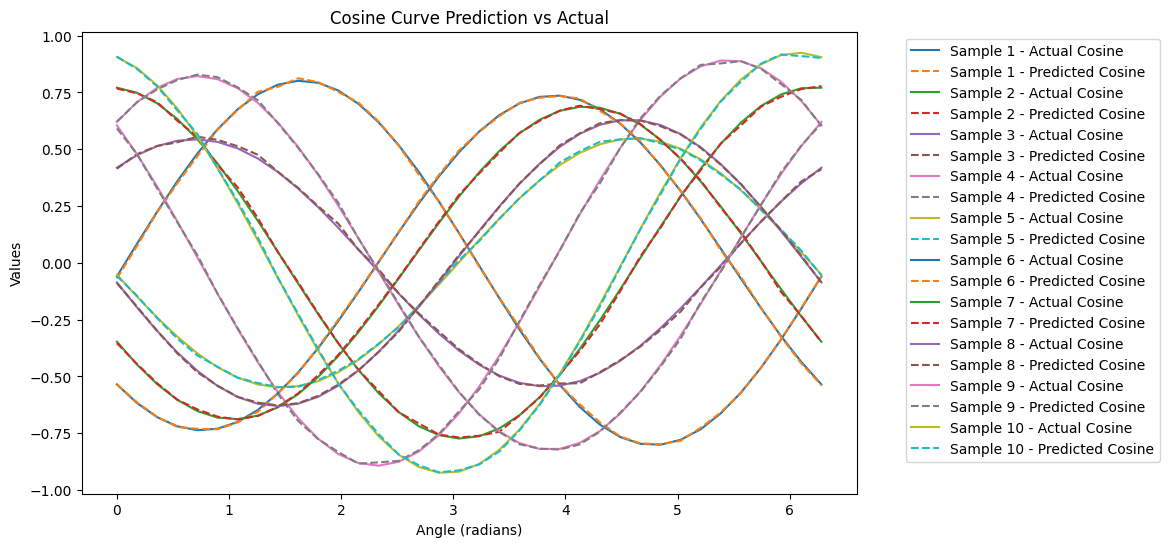

In [23]:
num_samples_to_plot = 10
plt.figure(figsize=(10, 6))

for i in range(num_samples_to_plot):
    plt.plot(x_values, y_test[i], label=f'Sample {i+1} - Actual Cosine')
    plt.plot(x_values, y_pred[i], '--', label=f'Sample {i+1} - Predicted Cosine')

plt.title('Cosine Curve Prediction vs Actual')
plt.xlabel('Angle (radians)')
plt.ylabel('Values')
plt.legend(loc='upper right',bbox_to_anchor=(1.4, 1.0))
plt.show()